###### 03 Geometric Machine Learning for Shape Analysis

## A) Mean and Covariance on Manifolds and Shape Spaces

$\color{#003660}{\text{Nina Miolane - Assistant Professor}}$ @ BioShape Lab @ UCSB ECE


<center><img src="figs/03_frechetmean.png" width=250px alt="default"/></center>

# Previous Unit

- **Unit 1 (Geometry - Math!)**: Differential Geometry for Engineers
- **Unit 2 (Shapes)**: **Computational Representations of Biomedical Shapes**
  - A) Shapes of landmarks
  - B) Shapes of curves
  - C) Shapes of surfaces
  - D) Graphs
  - E) Deformations
- **Unit 3 (Machine Learning)**: Geometric Machine Learning for Shape Analysis
- **Unit 4 (Deep Learning)**: Geometric Deep Learning for Shape Analysis

$\rightarrow$ We explained different models of shape spaces, and how these models constrain shape data to lie on different manifolds --- motivated by real-world scenarios.

<center><img src="figs/00_bioshape.jpg" width=350px alt="default"/></center>

# This Unit

- **Unit 1 (Geometry - Math!)**: Differential Geometry for Engineers
- **Unit 2 (Shapes)**: Computational Representations of Biomedical Shapes
- **Unit 3 (Machine Learning)**: **Geometric Machine Learning for Shape Analysis**
- **Unit 4 (Deep Learning)**: Geometric Deep Learning for Shape Analysis

$\rightarrow$ We explain the machine learning algorithms and statistics used in these real-world scenarios.

<center><img src="figs/00_bioshape.jpg" width=350px alt="default"/></center>


In our applications, after we have modeled the shape space:
- landmarks: tangent PCA: visualization
- spines and articulated models: tangent PCA: principal modes of variations
- cells: mean shape and distances to the mean shape
- surface: mean shape
- deformation: geodesic regression

# Overview of AI and Machine Learning

<center><img src="figs/03_ai.png" width=800px alt="default"/></center>

# Overview of AI and Machine Learning (ML)

$\color{#EF5645}{\text{Definition}}$: Artificial Intelligence (AI) represents the techniques that enable machines to mimic human intelligence.

$\color{#047C91}{\text{Example}}$: We can hard-code a chess strategy in a computer,by a decision tree deciding what is the best move for the computer given a situation on the board.



$\color{#EF5645}{\text{Definition}}$: Machine Learning (ML) represents the techniques that enable machines to mimic human intelligence by learning from data.

$\color{#047C91}{\text{Example}}$: The computer has learned what is the next best move, by looking at millions of chess games.

$\color{#EF5645}{\text{Remark}}$: ML is therefore a sub-field of AI.

# Overview of Machine Learning (ML)

Machine Learning is divided into two principal categories of algorithms: supervised and unsupervised learning algorithms. Both learn from data.

$\color{#EF5645}{\text{Definition}}$: Supervised learning refers to the task of learning a function that maps an input $x$ to an output $y$ based on example input-output pairs. We say that the model is:
- a classification if the outputs are categorical,
- a regression if the outputs are quantitative.

$\color{#047C91}{\text{Exercise}}$: Regression or Classification?
- Learning a function that takes a cancer cell shape as input and outputs the type of drug that has been given to this cell.
- Learning a function that takes a brain shape as input and outputs the age of the subject.


$\color{#EF5645}{\text{Definition}}$: Unsupervised learning refers to the task of discovering any naturally occuring patterns in a dataset of data points $x$. We say that the model is:
- a clustering: if we want to find groups (clusters),
- a dimension reduction: if we want to find the main sources of variations.

$\color{#047C91}{\text{Exercise}}$: Clustering or dimension reduction?
- Visualizing a high-dimensional dataset (e.g. cell shapes) in 2 dimensions.
- Finding that skull shapes form two separable groups.

# Generalize Machine Learning to Manifolds?

We already generalized the elementary operations.

- $\color{#EF5645}{\text{Addition}}$: add a vector to a point to get a point --> $\color{#047C91}{\text{Exponential}}$
- $\color{#EF5645}{\text{Subtraction}}$: subtract two points to get a vector --> $\color{#047C91}{\text{Logarithm}}$
- $\color{#EF5645}{\text{Distance}}$: compute distance between two points --> $\color{#047C91}{\text{Geodesic Distance}}$
- $\color{#EF5645}{\text{Straight Line}}$: computing the curve of shortest length between two points --> $\color{#047C91}{\text{Geodesic}}$

Now, we generalize the statistical and machine learning concepts:
- the concept of mean
- supervised learning techniques
- unsupervised learning techniques.

# Outline

- **Unit 1 (Geometry - Math!)**: Differential Geometry for Engineers
- **Unit 2 (Shapes)**: Computational Representations of Biomedical Shapes
- **Unit 3 (Machine Learning)**: **Geometric Machine Learning for Shape Analysis**
  - **A) Mean and Covariance**
  - B) Supervised Learning: Classification
  - C) Supervised Learning: Regression
  - D) Unsupervised Learning: Clustering
  - E) Unsupervised Learning: Dimension Reduction
- **Unit 4 (Deep Learning)**: Geometric Deep Learning for Shape Analysis

$\rightarrow$ We explain the machine learning algorithms and statistics used in this real-world scenarios.

<center><img src="figs/00_bioshape.jpg" width=350px alt="default"/></center>

# Outline

- **Unit 1 (Geometry - Math!)**: Differential Geometry for Engineers
- **Unit 2 (Shapes)**: Computational Representations of Biomedical Shapes
- **Unit 3 (Machine Learning)**: **Geometric Machine Learning for Shape Analysis**
  - **A) Mean and Covariance**
    - Motivation: Mean of Cell Shapes
    - Theory: Traditional mean and covariance
    - Theory: Mean and covariance on manifolds
  - B) Supervised Learning: Classification
  - C) Supervised Learning: Regression
  - D) Unsupervised Learning: Clustering
  - E) Unsupervised Learning: Principal Component Analysis
- **Unit 4 (Deep Learning)**: Geometric Deep Learning for Shape Analysis


# Motivation: Mean of Cancer Cells

$\color{#EF5645}{\text{Question on cells}}$: Which cancer treatments have a stronger effect on the actin and cytoskeleton?

$\color{#EF5645}{\text{Our answer}}$: Compute the **mean cell shape** for each cancer treatment and see which ones are the more irregular.

<center><img src="figs/02_cells.png" width=1300px alt="default"/></center>

<center><img src="figs/03_meancell.png" width=400px alt="default"/></center>

This leads to the question:
- How do we generalize the notion of "mean" to manifolds, e.g. to shape spaces, e.g. to shape space of curves?
- What is in the code of `FrechetMean` ?

<center><img src="figs/03_meancell_irregular.png" width=900px alt="default"/></center>

# Theory: Traditional Mean and Covariance

## Mean

$\color{#EF5645}{\text{Definition}}$: Consider a dataset of points in a vector space $x_1, ..., x_n \in \mathbb{R}^m$. The sample mean of these points is defined as:
$$\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i.$$

$\color{#EF5645}{\text{Remark}}$: This is a linear definition, in the sense that the mean is a linear combination of the data points.

## Covariance

$\color{#EF5645}{\text{Definition}}$: Consider a dataset of points in a vector space $x_1, ..., x_n \in \mathbb{R}^m$. The sample covariance of these points is defined as:
$$\Sigma = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})(x_i - \bar{x})^T =\left(\begin{array}{ccc}\operatorname{Var}\left(x^{(1)}\right) & \ldots & \operatorname{Cov}\left(x^{(1)}, x^{(m)}\right) \\ \vdots & \ddots & \vdots \\ \operatorname{Cov}\left(x^{(m)}, x^{(1)}\right) & \ldots & \operatorname{Var}\left(x^{(m)}\right)\end{array}\right).$$

$\color{#047C91}{\text{Example}}$: Illustration of mean and covariance for $m=2$: $n$ data points in 2 dimensions.
<center><img src="figs/03_meancov.png" width=800px alt="default"/></center>

## Need for Generalization to Manifolds

Why not directly using the traditional definitions of mean and covariance on manifolds?

$\color{#047C91}{\text{Example}}$: Let's try to use the traditional definition of mean on the sphere!

In [2]:
import numpy as np
from geomstats.geometry.hypersphere import Hypersphere

sphere = Hypersphere(dim=2)
points = np.array([
     [-0.71502435, -0.41197257, -0.56481748],
     [-0.997575,   -0.04788171,  0.05051201]
])
print(sphere.belongs(points))
linear_mean = np.sum(points, axis=0) / 2
print(linear_mean)

[ True  True]
[-0.85629968 -0.22992714 -0.25715273]


We plot the points and their mean computed with the linear formula.

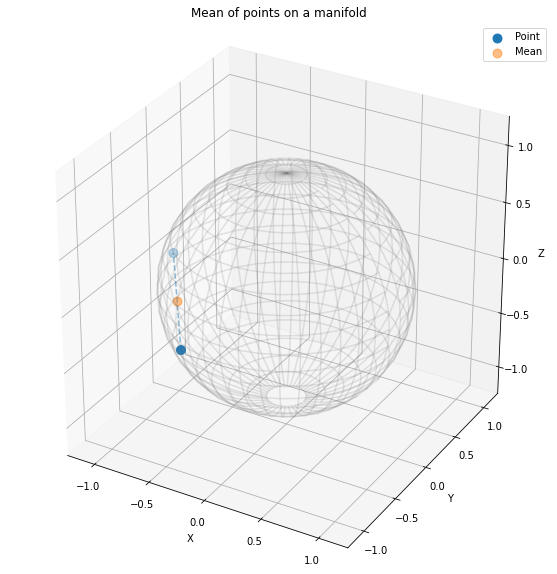

In [4]:
import matplotlib.pyplot as plt
import geomstats.visualization as viz

fig = plt.figure(figsize=(10, 10)); ax = fig.add_subplot(111, projection="3d")
viz.plot(points, ax=ax, space="S2", label="Point", s=80)
ax.plot(points[:, 0], points[:, 1], points[:, 2], linestyle="dashed", alpha=0.5,)
ax.scatter(linear_mean[0], linear_mean[1], linear_mean[2], label="Mean", s=80, alpha=0.5)
ax.set_title("Mean of points on a manifold"); ax.legend();

What happened? The mean of two points on a manifold (the sphere) is not on the manifold. 

$\color{#047C91}{\text{Example}}$: The mean of two cell shapes would not be a cell shape!

In [5]:
print(sphere.belongs(linear_mean))

False


Instead, we need to compute a generalization of the mean for manifolds: the Frechet mean.

In [6]:
from geomstats.learning.frechet_mean import FrechetMean

mean = FrechetMean(metric=sphere.metric)
mean.fit(points)
frechet_mean = mean.estimate_

We plot the points and their mean computed with the generalization of the mean to manifolds.

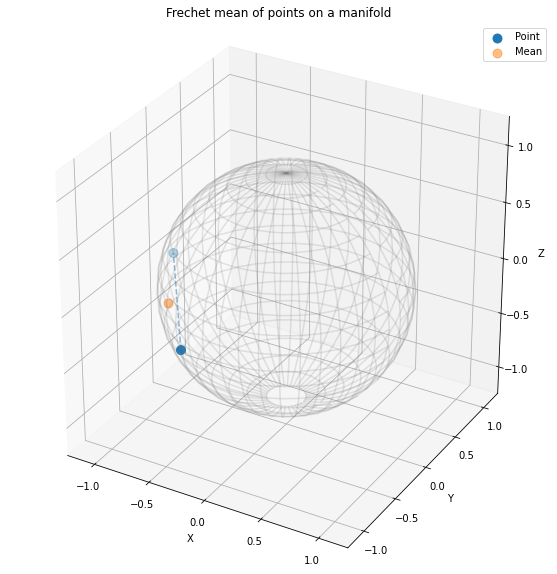

In [9]:
import matplotlib.pyplot as plt
import geomstats.visualization as viz

fig = plt.figure(figsize=((10, 10))); ax = fig.add_subplot(111, projection="3d")
viz.plot(points, ax=ax, space="S2", label="Point", s=80)
ax.plot(points[:, 0], points[:, 1], points[:, 2], linestyle="dashed", alpha=0.5,)
ax.scatter(frechet_mean[0], frechet_mean[1], frechet_mean[2], label="Mean", s=80, alpha=0.5)
ax.set_title("Frechet mean of points on a manifold"); ax.legend();

# Theory: Mean and Covariance on Manifolds

## Generalizing the Definition of Mean

We use a property of the mean on vector spaces, and make this property the definition of the mean on manifolds.

$\color{#6D7D33}{\text{Property}}$: Consider a dataset of points in a vector space $x_1, ..., x_n \in \mathbb{R}^m$, and consider $\bar{x}$ their mean. Then, $\bar{x}$ verifies:
$$\bar{x} = \text{argmin}_x \sum_{i=1}^n ||x - x_i||^2 ,$$
i.e. the mean minimizes the sum of the square distances to the data points.

$\color{#047C91}{\text{Exercise}}$: This property uses a notion of squared norm $||^2$: how will we generalize this to manifolds?

<center><img src="figs/03_means.jpg" width=400px alt="default"/></center>

## Fréchet Mean

$\color{#EF5645}{\text{Definition}}$: Consider a dataset of points on a manifold $x_1, ..., x_n \in M$. The Fréchet mean(s) of these points are the point(s) that verify:
$$\bar{x} = \text{argmin}_x \sum_{i=1}^n d(x, x_i)^2 ,$$
i.e. the mean minimizes the sum of the square _geodesic_ distances to the data points.

$\color{#047C91}{\text{Exercise}}$: Can we have several Fréchet means for a given dataset? Give an example.

<center><img src="figs/03_frechetmean.png" width=250px alt="default"/></center>

## Fréchet Mean in Practice

In practice, Fréchet mean has to be implemented via a gradient descent, to find the argument minimum $\bar{x}$.

$\rightarrow$ this gradient descent is implemented in the class `FrechetMean`.

## "Trick": Tangent Space at the Fréchet Mean

The Fréchet mean gives us a way of transforming our non-linear data into vectors!
- Compute the Fréchet mean $\bar{x}$ of the data point
- Consider the tangent space $T_\bar{x}M$of the manifold $M$ at $\bar{x}$
- Compute the Logarithms of the data points $x_i$ at $\bar{x}$

$\rightarrow$ Get a dataset on a vector space!

<center><img src="figs/03_ts.png" width=400px alt="default"/></center>

## Consequences

Once our dataset $x_1, ..., x_n \in M$ is transformed into $\text{Log}_{\bar{x}}x_1, ..., \text{Log}_{\bar{x}}x_n \in T_{\bar{x}}M$:
- We can apply any traditional statistics or machine learning algorithm
- $\color{#047C91}{\text{Example}}$: We can define the covariance!

$\color{#EF5645}{\text{Remark}}$: However, if the manifold has a lot of curvature, applying statistics or ML in the tangent space is not recommended.

## Generalizing the Definition of Covariance

$\color{#EF5645}{\text{Definition}}$: Consider a dataset of points on a manifold $x_1, ..., x_n \in M$, and their Fréchet mean $\bar{x}$. The covariance at $\bar{x}$ is defined by:
$$Cov(x) = \frac{1}{n} \sum_{i=1}^n \text{Log}_{\bar{x}}x_i.\text{Log}_{\bar{x}}x_i^T,$$
i.e. we use the traditional definition of covariance on the Logarithms of the points.

## Application: Frechet Mean of Cancer Cells

This explains the computations behind the mean of cancer cell shapes.

<center><img src="figs/03_meancell_irregular.png" width=900px alt="default"/></center>

# Outline

- **Unit 1 (Geometry - Math!)**: Differential Geometry for Engineers
- **Unit 2 (Shapes)**: Computational Representations of Biomedical Shapes
- **Unit 3 (Machine Learning)**: **Geometric Machine Learning for Shape Analysis**
  - **A) Mean and Covariance**
  - B) Supervised Learning: Classification
  - C) Supervised Learning: Regression
  - D) Unsupervised Learning: Clustering
  - E) Unsupervised Learning: Principal Component Analysis
- **Unit 4 (Deep Learning)**: Geometric Deep Learning for Shape Analysis

<center><img src="figs/00_bioshape.jpg" width=350px alt="default"/></center>